In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.drop('User ID', axis = 1, inplace = True)

In [5]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(3), object(1)
memory usage: 11.0+ KB


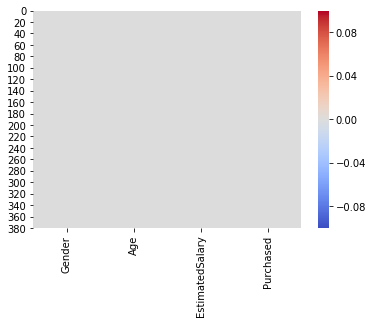

In [7]:
sns.heatmap(df.isnull(), cmap='coolwarm')

In [8]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [9]:
gender = pd.get_dummies(df['Gender'], drop_first=True)

In [10]:
df.drop('Gender', axis =1, inplace=True)

In [11]:
df = pd.concat([gender, df], axis=1)

In [12]:
df.head()

,Male,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


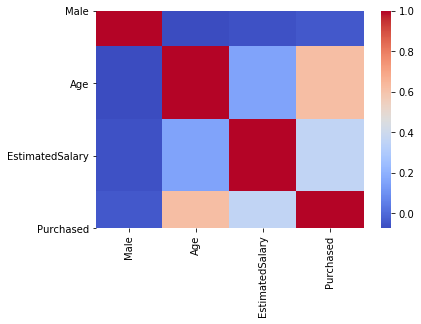

In [13]:
sns.heatmap(df.corr(), cmap = 'coolwarm')

In [14]:
df.drop('Male', axis =1, inplace=True)

In [15]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [16]:
df.mean()

Age                   37.6550
EstimatedSalary    69742.5000
Purchased              0.3575
dtype: float64

In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df.drop('Purchased', axis =1))
scaled_array = ss.transform(df.drop('Purchased', axis =1))

In [18]:
x  = pd.DataFrame(data = scaled_array, columns = df.columns[:-1])
y = df['Purchased']

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [20]:
x_train.to_csv('train.csv')

In [21]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(x_train, y_train)

C:\Users\Pranav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [22]:
ypred = classifier.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred)

array([[67,  6],
       [ 3, 44]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ypred)

0.925